In [184]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [185]:
d1=pd.read_csv('/content/leads_basic_details.csv')
d2=pd.read_csv('/content/sales_managers_assigned_leads_details.csv')
d3=pd.read_csv('/content/leads_interaction_details.csv')
d4=pd.read_csv('/content/leads_demo_watched_details.csv')
d5=pd.read_csv('/content/leads_reasons_for_no_interest.csv')

First 5 rows of d1

### EDA on leads_basic Data

In [186]:
d1.head()

,lead_id,age,gender,current_city,current_education,parent_occupation,lead_gen_source
0,USR1001,16,FEMALE,Hyderabad,Intermediate,Private Employee,social_media
1,USR1002,20,MALE,Bengaluru,B.Tech,Business,user_referrals
2,USR1003,20,FEMALE,Visakhapatnam,B.Tech,Lawyer,user_referrals
3,USR1004,16,MALE,Mumbai,Intermediate,IT Employee,user_referrals
4,USR1005,16,MALE,Chennai,Intermediate,Government Employee,user_referrals


There are 360 rows and 7 columns in the dataset d1

In [187]:
d1.shape

(360, 7)

Datatypes of each variables in d1

In [188]:
d1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 360 entries, 0 to 359
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   lead_id            360 non-null    object
 1   age                360 non-null    int64 
 2   gender             360 non-null    object
 3   current_city       360 non-null    object
 4   current_education  360 non-null    object
 5   parent_occupation  360 non-null    object
 6   lead_gen_source    360 non-null    object
dtypes: int64(1), object(6)
memory usage: 19.8+ KB


Statistical information

In [189]:
d1.describe()

,age
count,360.000000
mean,21.561111
std,11.555444
min,16.000000
25%,18.000000
50%,21.000000
75%,24.000000
max,211.000000


Checking duplicate rows

In [190]:
d1.duplicated().sum()

0

Checking whether there are null values in the dataset

In [191]:
d1.isnull().sum()

lead_id              0
age                  0
gender               0
current_city         0
current_education    0
parent_occupation    0
lead_gen_source      0
dtype: int64

<Axes: xlabel='age', ylabel='count'>

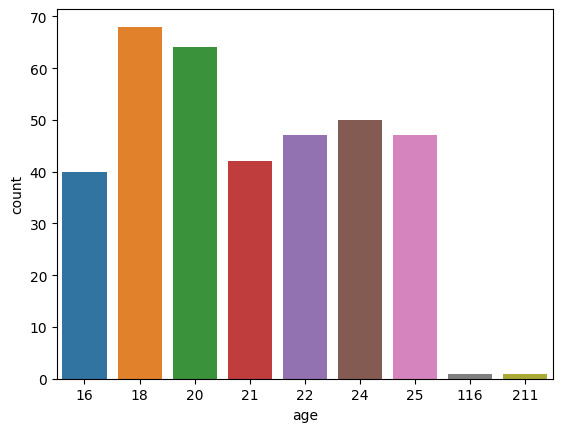

In [192]:
sns.countplot(x=d1['age'],data=d1)

From the graph we can see that


1.    majority of leads are between 17 and 24



<Axes: >

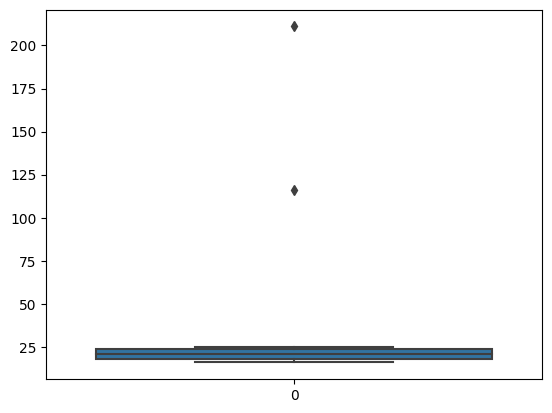

In [193]:
sns.boxplot(d1['age'])

There are outliers in the age column
and we can see that there are 2 values which is very high,we should delete these rows

In [194]:
d1[d1['age']>100]

,lead_id,age,gender,current_city,current_education,parent_occupation,lead_gen_source
17,USR1018,211,MALE,Hyderabad,Degree,IT Employee,social_media
300,USR1301,116,FEMALE,Hyderabad,Intermediate,Private Employee,social_media


In [195]:
#removing outliers
d1new=d1.drop([17,300])

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'Hyderabad'),
  Text(1, 0, 'Bengaluru'),
  Text(2, 0, 'Visakhapatnam'),
  Text(3, 0, 'Mumbai'),
  Text(4, 0, 'Chennai'),
  Text(5, 0, 'Kochi')])

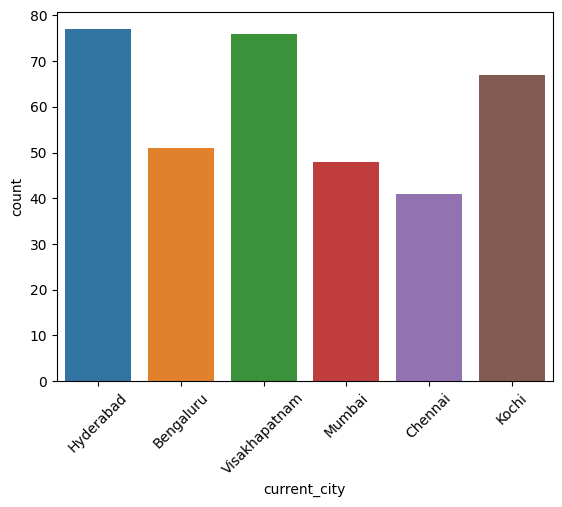

In [196]:
sns.countplot(x=d1['current_city'],data=d1)
plt.xticks(rotation=45)

From the above graph we can see that

1.   most of the leads are from hyderabad and Visakhapatnam
2.   Least number of leads are from Chennai and Mumbai




<Axes: xlabel='gender', ylabel='count'>

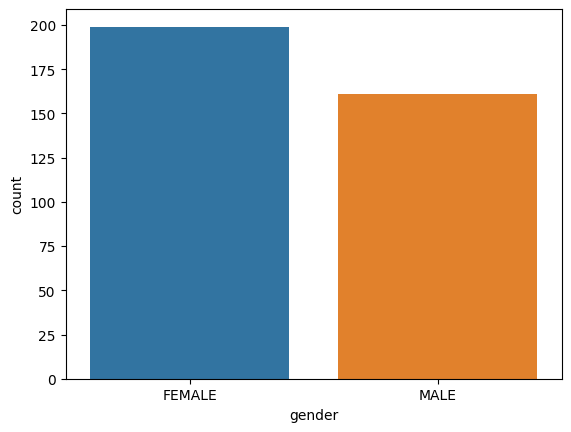

In [197]:
sns.countplot(x=d1['gender'],data=d1)

From the graph we see that Females are more than Males

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'Intermediate'),
  Text(1, 0, 'B.Tech'),
  Text(2, 0, 'Degree'),
  Text(3, 0, 'Looking for Job'),
  Text(4, 0, '10th Completed'),
  Text(5, 0, 'Intermediate Completed')])

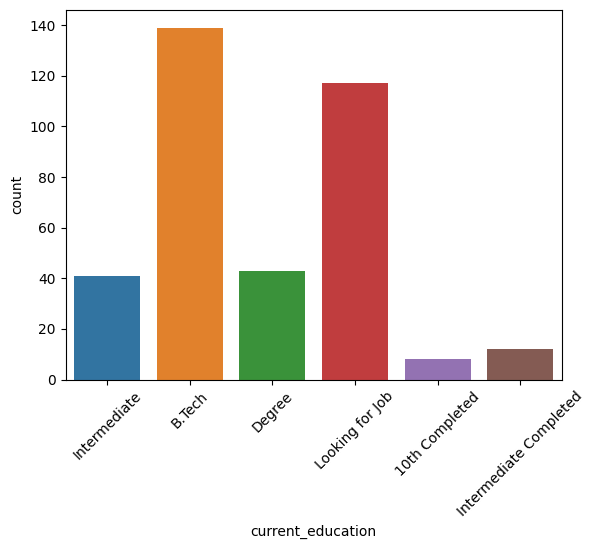

In [198]:
sns.countplot(x=d1['current_education'],data=d1)
plt.xticks(rotation=45)

From the above graph we see that


1.   Majority Leads are from B.Tech background and those leads who are looking for job



(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, 'Private Employee'),
  Text(1, 0, 'Business'),
  Text(2, 0, 'Lawyer'),
  Text(3, 0, 'IT Employee'),
  Text(4, 0, 'Government Employee'),
  Text(5, 0, 'Doctor'),
  Text(6, 0, 'Professor/Faculty')])

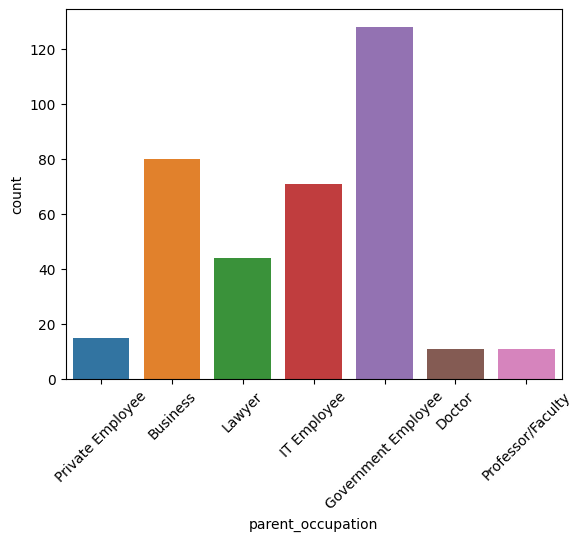

In [199]:
sns.countplot(x=d1['parent_occupation'],data=d1)
plt.xticks(rotation=45)

The above graph shows that

1.   Majority of the leads parent occupation is government employee

1.   Leads having Doctor,private employee and Professor/Faculty as parent occupation are lowest in number






Text(0.5, 1.0, 'Lead Gen source')

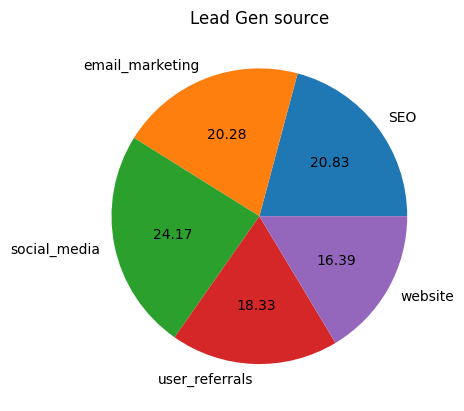

In [200]:
d1_pie_chart = d1.groupby('lead_gen_source').size().plot(kind = 'pie', autopct='%.2f', y='lead_id', ylabel='')
d1_pie_chart.set_title('Lead Gen source')

From the above graph we see that


1.   24.17% leads came to know about the firm through social media
2.   20.83% leads came to know about the firm through SEO

1.   20.28% leads came to know about the firm through
     email marketing
2.   18.33% leads came to kno2 about the firm through user referrals

1.    16.39% leads came to know about the firmthrough website







### EDA on sales_manager_assigned_leads_Details Data





To see the First 5 rows in the dataset

In [201]:
d2.head()

,snr_sm_id,jnr_sm_id,assigned_date,cycle,lead_id
0,SNR501MG,JNR1001MG,1/1/2022,1,USR1001
1,SNR501MG,JNR1001MG,1/1/2022,1,USR1002
2,SNR501MG,JNR1001MG,1/1/2022,1,USR1003
3,SNR501MG,JNR1001MG,1/1/2022,1,USR1004
4,SNR501MG,JNR1001MG,1/1/2022,1,USR1005


Gives the number of rows and columns in the dataset

In [202]:
d2.shape

(360, 5)

To check whether there are duplicated rows

In [203]:
d2.duplicated().sum()

0

To check there are null values

In [204]:
d2.isnull().sum()

snr_sm_id        0
jnr_sm_id        0
assigned_date    0
cycle            0
lead_id          0
dtype: int64

To see the datatypes of each columns in the dataset

In [205]:
d2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 360 entries, 0 to 359
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   snr_sm_id      360 non-null    object
 1   jnr_sm_id      360 non-null    object
 2   assigned_date  360 non-null    object
 3   cycle          360 non-null    int64 
 4   lead_id        360 non-null    object
dtypes: int64(1), object(4)
memory usage: 14.2+ KB


To see the statistical information

In [206]:
d2.describe()

,cycle
count,360.000000
mean,2.469444
std,1.124139
min,1.000000
25%,1.000000
50%,2.000000
75%,3.000000
max,4.000000


In [207]:
d2['snr_sm_id'].unique()

array(['SNR501MG', 'SNR502MG', 'SNR503MG', 'SNR504MG'], dtype=object)

In [208]:
d2['jnr_sm_id'].unique()

array(['JNR1001MG', 'JNR1002MG', 'JNR1003MG', 'JNR1004MG', 'JNR1005MG',
       'JNR1006MG', 'JNR1007MG', 'JNR1008MG', 'JNR1009MG', 'JNR1010MG',
       'JNR1011MG', 'JNR1012MG', 'JNR1013MG', 'JNR1014MG', 'JNR1015MG',
       'JNR1016MG'], dtype=object)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 [Text(0, 0, 'JNR1001MG'),
  Text(1, 0, 'JNR1002MG'),
  Text(2, 0, 'JNR1003MG'),
  Text(3, 0, 'JNR1004MG'),
  Text(4, 0, 'JNR1005MG'),
  Text(5, 0, 'JNR1006MG'),
  Text(6, 0, 'JNR1007MG'),
  Text(7, 0, 'JNR1008MG'),
  Text(8, 0, 'JNR1009MG'),
  Text(9, 0, 'JNR1010MG'),
  Text(10, 0, 'JNR1011MG'),
  Text(11, 0, 'JNR1012MG'),
  Text(12, 0, 'JNR1013MG'),
  Text(13, 0, 'JNR1014MG'),
  Text(14, 0, 'JNR1015MG'),
  Text(15, 0, 'JNR1016MG')])

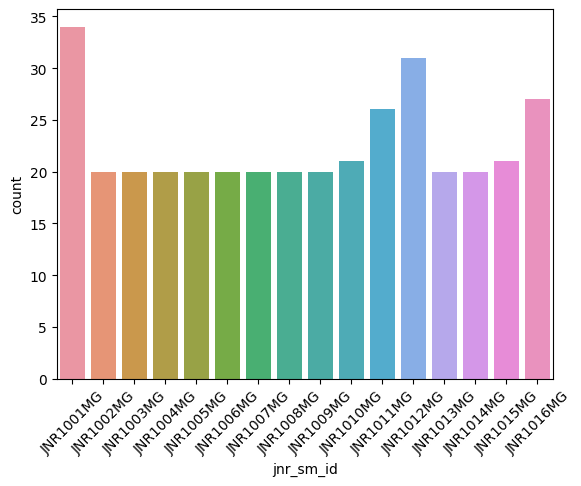

In [209]:
sns.countplot(x=d2['jnr_sm_id'])
plt.xticks(rotation=45)

From the graph we see that


1.   10 Junior managers has 20 leads under them  
2.   6 Junior managers has more than 20 leads under them



<Axes: xlabel='snr_sm_id', ylabel='count'>

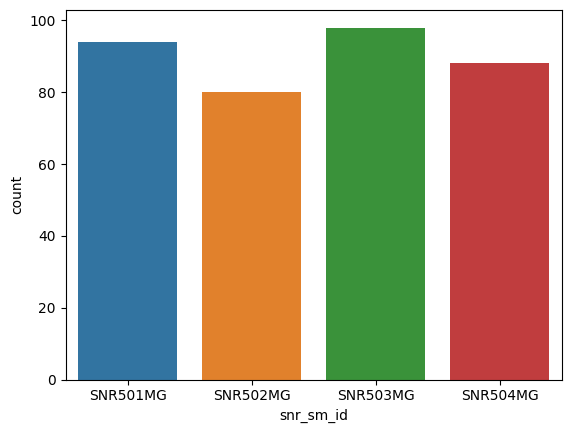

In [210]:
sns.countplot(x=d2['snr_sm_id'],data=d2)

We see that the Junior Sales Managers are evenly assigned among Senior Sales Managers

###EDA on leads_interaction_details

First 5 rows of the dataset

In [211]:
d3.head()

,jnr_sm_id,lead_id,lead_stage,call_done_date,call_status,call_reason
0,JNR1001MG,USR1001,lead,1/2/2022,successful,lead_introduction
1,JNR1001MG,USR1001,lead,1/2/2022,successful,demo_schedule
2,JNR1001MG,USR1002,lead,1/3/2022,successful,lead_introduction
3,JNR1001MG,USR1002,lead,1/4/2022,successful,demo_schedule
4,JNR1001MG,USR1002,awareness,1/5/2022,successful,post_demo_followup


number of rows and columns in the dataset

In [212]:
d3.shape

(2192, 6)

To see the datatypes of each columns in the dataset

In [213]:
d3.dtypes

jnr_sm_id         object
lead_id           object
lead_stage        object
call_done_date    object
call_status       object
call_reason       object
dtype: object

In [214]:
d3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2192 entries, 0 to 2191
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   jnr_sm_id       2192 non-null   object
 1   lead_id         2192 non-null   object
 2   lead_stage      2192 non-null   object
 3   call_done_date  2192 non-null   object
 4   call_status     2192 non-null   object
 5   call_reason     2192 non-null   object
dtypes: object(6)
memory usage: 102.9+ KB


Checking for null values in the dataset

In [215]:
d3.isnull().sum()

jnr_sm_id         0
lead_id           0
lead_stage        0
call_done_date    0
call_status       0
call_reason       0
dtype: int64

Checking for duplicates

In [216]:
d3.duplicated().sum()

438

We found that there are 438 duplicate data which we should delete

In [217]:
d3new=d3.drop_duplicates(keep='last')

remaining data after removing duplicates

In [218]:
d3new.shape

(1754, 6)

<Axes: xlabel='lead_stage', ylabel='count'>

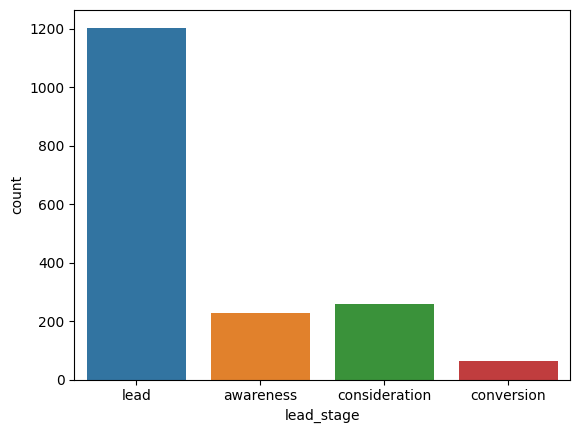

In [219]:
sns.countplot(x=d3new['lead_stage'],data=d3new)

The above result says, number of leads are high when comparing to the other

(array([0, 1]), [Text(0, 0, 'successful'), Text(1, 0, 'unsuccessful')])

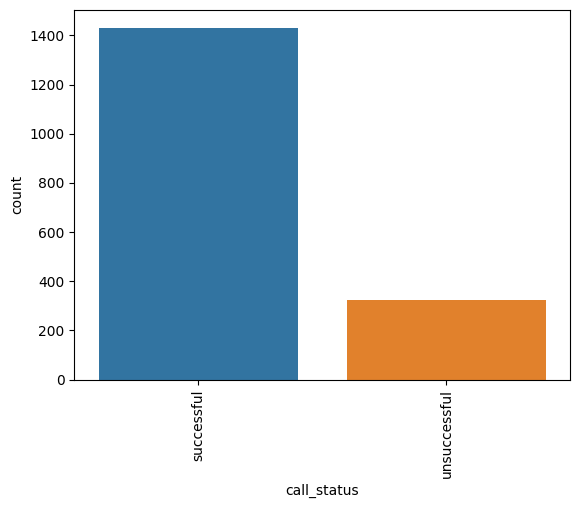

In [220]:
sns.countplot(x=d3new['call_status'])
plt.xticks(rotation=90)

The above result shows that most of the leads have had coversation with their Junior sales manager

(array([0, 1, 2, 3, 4, 5, 6, 7]),
 [Text(0, 0, 'lead_introduction'),
  Text(1, 0, 'demo_schedule'),
  Text(2, 0, 'post_demo_followup'),
  Text(3, 0, 'followup_for_consideration'),
  Text(4, 0, 'interested_for_conversion'),
  Text(5, 0, 'followup_for_conversion'),
  Text(6, 0, 'successful_conversion'),
  Text(7, 0, 'demo_not_attended')])

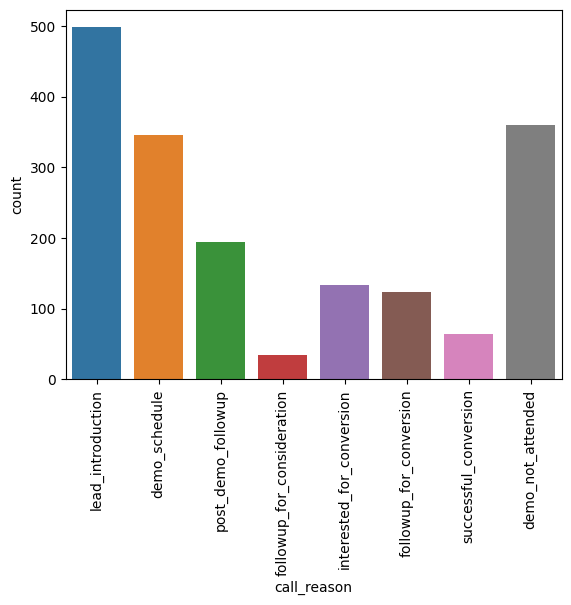

In [221]:
sns.countplot(x=d3new['call_reason'],data=d3new)
plt.xticks(rotation=90)

Text(0.5, 1.0, 'call_reason')

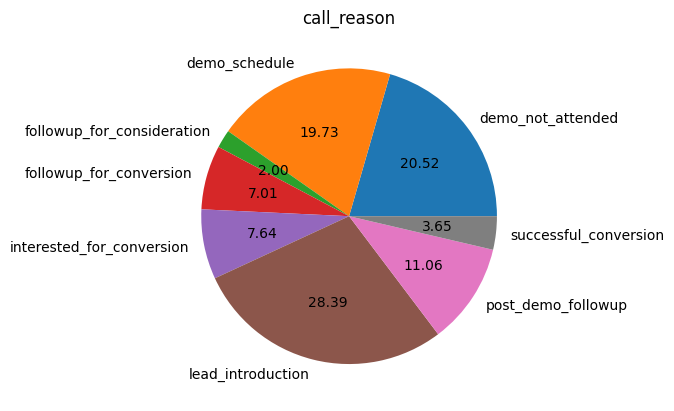

In [222]:
d3new_pie_chart = d3new.groupby('call_reason').size().plot(kind = 'pie', autopct='%.2f', y='lead_id', ylabel='')
d3new_pie_chart.set_title('call_reason')

The above charts shows that Majority of leads are in "lead" stage

*   lead_introduction(28.39%)+demo_scedule(19.73%)+demo_not_attended(20.52%)= 68.64


Percentage of leads in "Awareness" stage

*   post_demo_followup(11.06%)+followup_for_consideration(2%) = 13.19%

percentage of leads in "consideration" stage


*  Interested_for_conversion(7.64%)+followup_for_conversion(7.01) = 14.65%


percentage of leads in "convertion" stage


*   successful_conversion(3.65%) = 3.65%










Very less proportion of leads are in conversion stage

### EDA on leads_demo_watched_details

First 5 rows

In [223]:
d4.head()

,lead_id,demo_watched_date,language,watched_percentage
0,USR1002,1/4/2022,Telugu,42
1,USR1003,1/7/2022,Telugu,81
2,USR1004,1/2/2022,Telugu,35
3,USR1005,1/3/2022,Hindi,38
4,USR1006,1/12/2022,Hindi,54


Number of rows and columns

In [235]:
d4.shape

(194, 4)

Datatypes of columns

In [224]:
d4.dtypes

lead_id               object
demo_watched_date     object
language              object
watched_percentage     int64
dtype: object

Basic Information about the dataset

In [225]:
d4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194 entries, 0 to 193
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   lead_id             194 non-null    object
 1   demo_watched_date   194 non-null    object
 2   language            194 non-null    object
 3   watched_percentage  194 non-null    int64 
dtypes: int64(1), object(3)
memory usage: 6.2+ KB


Stats

In [226]:
d4.describe()

,watched_percentage
count,194.000000
mean,56.634021
std,43.555635
min,2.000000
25%,35.000000
50%,55.500000
75%,75.750000
max,510.000000


Checking for null values

In [227]:
d4.isnull().sum()

lead_id               0
demo_watched_date     0
language              0
watched_percentage    0
dtype: int64

Checking for duplicates

In [228]:
d4.duplicated().sum()

0

<Axes: xlabel='language', ylabel='count'>

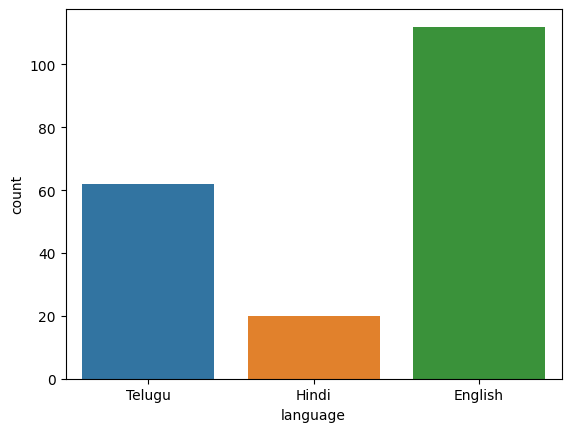

In [230]:
sns.countplot(x=d4['language'],data=d4)

From the above chart we can see


*   Majority of the leads watched in English language
*   Least watched in Hindi language
*   almost half of the leads watched in Telugu






<Axes: >

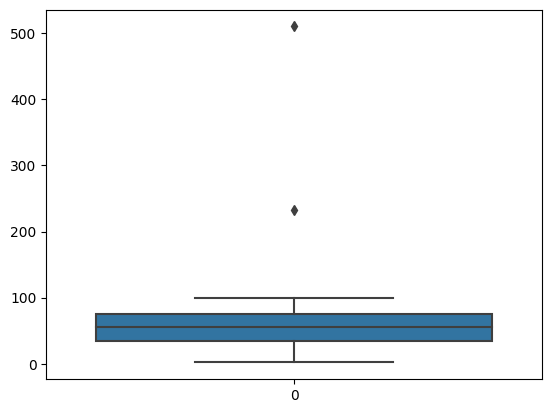

In [231]:
sns.boxplot(d4['watched_percentage'])

In [234]:
d4[d4['watched_percentage'] >150]

,lead_id,demo_watched_date,language,watched_percentage
94,USR1138,2/20/2022,English,510
133,USR1213,1/20/2022,Telugu,233


from the above statement we see that there are only 2 outliers out of 194 records so we can simply delete the outliers

In [237]:
d4new=d4.drop([94,133])

<Axes: >

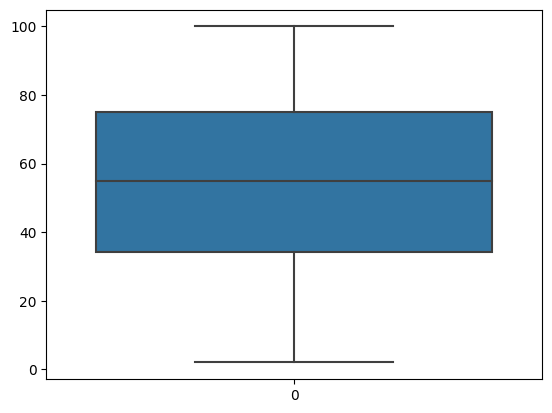

In [239]:
sns.boxplot(d4new['watched_percentage'])

we have deleted the outliers from weighted_percentage

<Axes: xlabel='watched_percentage', ylabel='Count'>

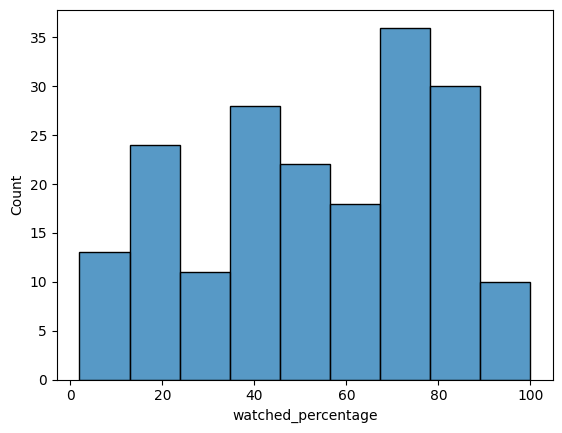

In [244]:
sns.histplot(d4new['watched_percentage'])

From the above chart we see that


*   More than 35 leads watched 70%-80% of the demo videos
*   More than 60% of video was covered by majority of the leads
*   Almost 10 leads watched full demo video






###EDA on leads_reasons_for_no_interest

First 5 rows

In [245]:
d5.head()

,lead_id,reasons_for_not_interested_in_demo,reasons_for_not_interested_to_consider,reasons_for_not_interested_to_convert
0,USR1001,No time for student,NaN,NaN
1,USR1003,NaN,No time for student,NaN
2,USR1004,NaN,Wants offline classes,NaN
3,USR1005,NaN,Can't afford,NaN
4,USR1006,NaN,Student not interested in domain,NaN


Basic information about dataset

In [246]:
d5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294 entries, 0 to 293
Data columns (total 4 columns):
 #   Column                                  Non-Null Count  Dtype 
---  ------                                  --------------  ----- 
 0   lead_id                                 294 non-null    object
 1   reasons_for_not_interested_in_demo      164 non-null    object
 2   reasons_for_not_interested_to_consider  79 non-null     object
 3   reasons_for_not_interested_to_convert   51 non-null     object
dtypes: object(4)
memory usage: 9.3+ KB


Checking for null values

In [247]:
d5.isnull().sum()

lead_id                                     0
reasons_for_not_interested_in_demo        130
reasons_for_not_interested_to_consider    215
reasons_for_not_interested_to_convert     243
dtype: int64

we can see there are null values but we dont need to treat it in this case

Lets see the unique values

In [248]:
d5['reasons_for_not_interested_in_demo'].unique()

array(['No time for student', nan, 'Student not interested in domain',
       'Wants offline classes', "Can't afford", 'Cannot afford',
       'Will join in final year'], dtype=object)

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'No time for student'),
  Text(1, 0, 'Student not interested in domain'),
  Text(2, 0, 'Wants offline classes'),
  Text(3, 0, "Can't afford"),
  Text(4, 0, 'Cannot afford'),
  Text(5, 0, 'Will join in final year')])

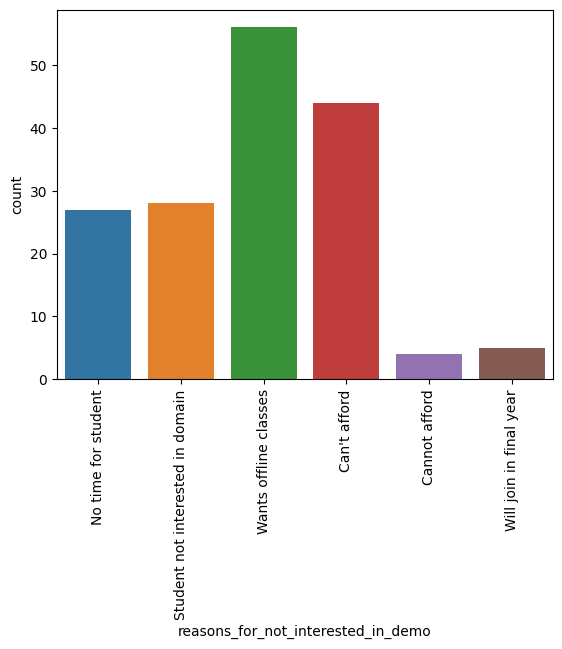

In [252]:
sns.countplot(x=d5['reasons_for_not_interested_in_demo'],data=d5)
plt.xticks(rotation=90)

We can see Can't afford and Cannot afford both are same, so we should merge it

In [256]:
d5['reasons_for_not_interested_in_demo'].replace({"Cannot afford":"Can't afford"}, inplace=True)

Text(0.5, 1.0, 'Resons for not interested in Demo')

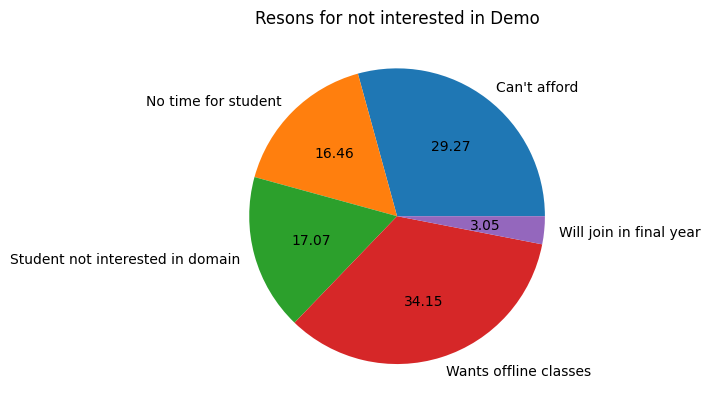

In [257]:
column2 = d5.groupby('reasons_for_not_interested_in_demo').size().plot(kind = 'pie', autopct='%.2f', y='lead_id', ylabel='')
column2.set_title('Resons for not interested in Demo')

we see that majority of leads want online classes

Text(0.5, 1.0, 'Resons for not interested to Consider')

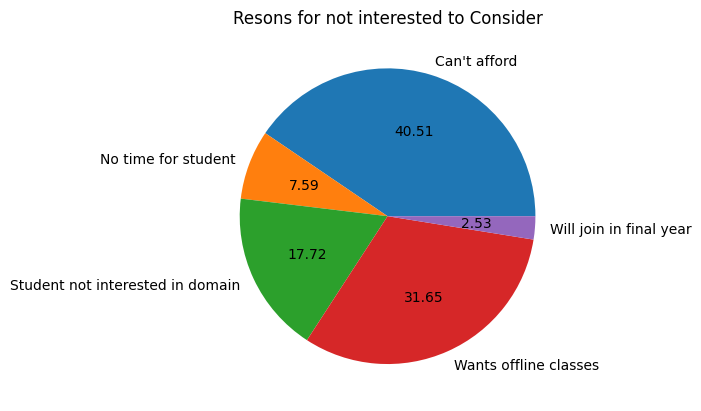

In [258]:
column3 = d5.groupby('reasons_for_not_interested_to_consider').size().plot(kind = 'pie', autopct='%.2f', y='lead_id', ylabel='')
column3.set_title('Resons for not interested to Consider')

Text(0.5, 1.0, 'Resons for not interested to Convert')

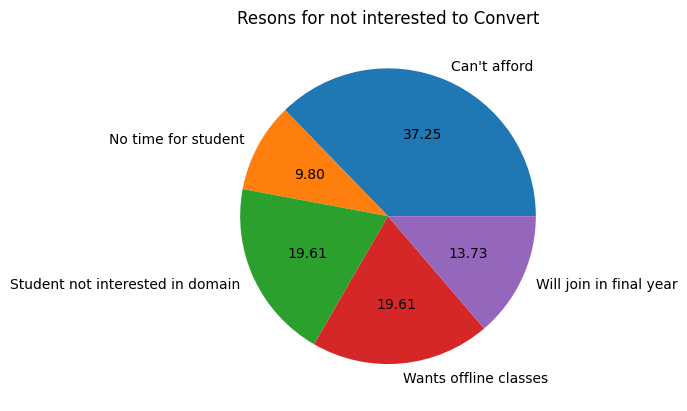

In [259]:
column4 = d5.groupby('reasons_for_not_interested_to_convert').size().plot(kind = 'pie', autopct='%.2f', y='lead_id', ylabel='')
column4.set_title('Resons for not interested to Convert')

Leads_reasons_for_no_interest

The top 2 reasons for the leads to drop:
1.   Affordability of the course
2.   Leads preferring offline classes



### OVERALL DATA ANALYSIS

1.   From the basic details of leads shows that we have to concentrate more on the leads whose ages between 17 to 24, which shows that they are mostly from the B.Tech background and also most of them are currently looking for jobs

2.   From the interaction details of the leads shows that most of the leads are available on calls. The majority of the calls are about not attending the demo video, which needs to be improved
1.   From the demo watched details of the leads shows, majority of leads are watching english languages and more than 60% of video are covered by majority of the leads.Overall its shows demo video is going fine but if its possible to make the demo video little more short that can increase the watch time

2. From the leads reasons for no interest are because of two major reasons one is about affordability of the courses and the other is about most of the leads are preferring for offline classes










Exporting the processed data to .csv

In [262]:
d1new.to_csv('new_leads_basic.csv')
d2.to_csv('new_sales_managers_assigned_leads_details.csv')
d3new.to_csv('new_leads_interaction_details.csv')
d4new.to_csv('new_leads_demo_watched_details.csv')
d5.to_csv('new_leads_reasons_for_no_interest.csv')